<div align = "center">
<img src="/oeson.png" alt="Oeson Learning" width="200" align = "center"/>
</div>

# Introduction

The goal of this project is to analyze social media data from a collection of Tweets related to the Coronavirus.  In particular, to determine the sentiment of user tweets in regards to Covid, based upon their location information..

Here are a few questions that this project seeks to answer:

- What is the distribution of sentiments from user tweets?
- Are certain locations likely to have more negative or positive sentiments?
- Are the differences between locations and their sentiments significant?
- Which type of words or word-pairs are most frequent across all users in regards to Covid?
- Can user sentiment be replicated using Chat-GPT technology?

**Data sources:**

The dataset was provided by [OesonLearning.com](https://www.oesonlearning.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Project Scope

**Analysis**

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better.  Some techinques involved in better understanding the linguistic data include:

- WordCloud
- Value counts
- Relationship between locations
- Sentiment of tweets

An important component of this project will be deciphering which geographical locations (i.e., countries) may have been more or less adversely affected by Covid.  Making this interpretation might be accomplished by inferences made from social media postings; in particular the sentiment of Twitter users who posted tweets during this timeframe.

**Generative Pre-Trained Transformer (GPT)**  

Chat-GPT is a quickly advancing main-stream technology that involves encoding linguestic tokens (i.e., word and word-pairs) into various transformer models to produce human-like responses.  This technology can be implemented to re-create user tweets that can similate various sentiments.

**Vader Sentiment Analysis.**

Finally, the tweet values were previously encoded along a scale of negative to positive sentiment; however, these scorings may not be completely accurate.  So another objective of this project is to re-analyze the sentiment values of the responses using the Vader Sentiment library to determine how accurate the initial encodings are.  These results will be compared to the initially provided Sentiment values.


#### Import Libraries

In [ ]:
# Install neccesary Packages
!python -m spacy download en_core_web_lg
!pip install -q -U tensorflow-text
!pip install -q tf-models-official

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.0/587.7 MB 245.8 kB/s eta 0:39:52
     ---------------------------------------- 0.3/587.7 MB 1.9 MB/s eta 0:05:09
     ---------------------------------------- 1.0/587.7 MB 4.6 MB/s eta 0:02:09
     ---------------------------------------- 1.9/587.7 MB 7.0 MB/s eta 0:01:24
     ---------------------------------------- 2.8/587.7 MB 9.1 MB/s eta 0:01:05
     --------------------------------------- 3.8/587.7 MB 10.4 MB/s eta 0:00:56
     --------------------------------------- 4.9/587.7 MB 12.2 MB/s eta 0:00:48
     --------------------------------------- 5.9/587.7 MB 13.0 MB/s eta 0:00:45
     --------------------------------------- 6.8/587.7 MB 13.6 MB/s eta 0:00:43
      -------------------------------------- 8.0/587.7 MB 14.

ERROR: Could not find a version that satisfies the requirement tensorflow-text (from versions: none)
ERROR: No matching distribution found for tensorflow-text
  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [54 lines of output]
  running egg_info
  writing lib3\PyYAML.egg-info\PKG-INFO
  writing dependency_links to lib3\PyYAML.egg-info\dependency_links.txt
  writing top-level names to lib3\PyYAML.egg-info\top_level.txt
  Traceback (most recent call last):
    File "C:\Users\user\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\user\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\user\anaconda3\Lib\site-packages\pip\_vendor\pyprojec

In [ ]:
!pip install spacy
#python --user spacy download en

In [ ]:
#Import Libraries
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import sklearn
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Activation
from keras.layers import Input, TextVectorization
from keras.callbacks import *
from keras.metrics import *
from keras.backend import clear_session
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.models import load_model
from sklearn.model_selection import train_test_split
from google.colab import drive
import en_core_web_lg
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve
nltk.download('stopwords')

ModuleNotFoundError: No module named 'keras'

#### Import Libraries and Dataset

In [2]:
#Importing required librarires

#Loading libraries
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
#import re

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_covid = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/Corona.csv',encoding_errors= 'replace')
df_covid.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Data Visualization

Data Size:
(41157, 6) 

Sentiment Distribution:
Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64 

Visual Distribution: 



Text(0.5, 1.0, 'Overall Sentiment QTY')

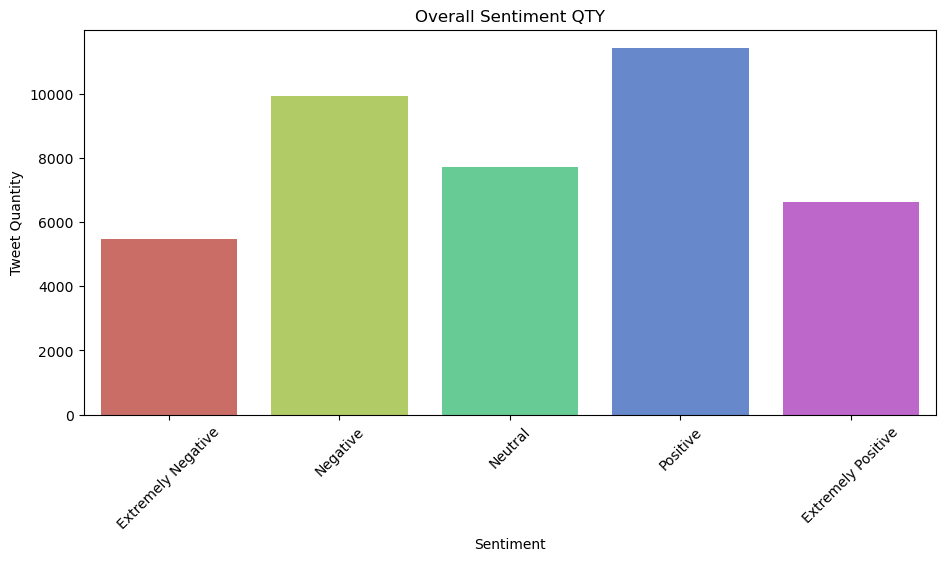

In [ ]:
#Visualize the dataset & Sentiment Counts
import seaborn as sns

print('Data Size:')
print(df_covid.shape, '\n')
print('Sentiment Distribution:'),'\n'
print(df_covid.Sentiment.value_counts(),'\n')
print('Visual Distribution:','\n')

Index = [1,2,3]
plt.figure(figsize=(11,5))
fig = sns.countplot(x = 'Sentiment', data= df_covid, palette = 'hls',
                    order = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']
                   )
plt.tick_params(axis='x', labelrotation=45)
plt.ylabel('Tweet Quantity')
plt.xlabel('Sentiment')
plt.title('Overall Sentiment QTY')

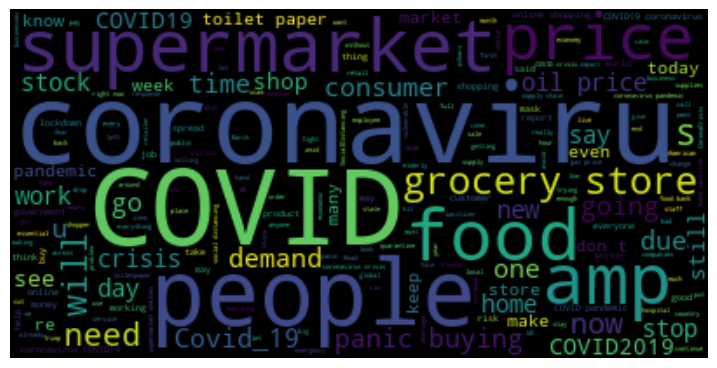

In [ ]:
# instantiate a word cloud regarding
stop = set(STOPWORDS)
covid_wc = WordCloud(background_color='white', max_words=5000, stopwords=stop)

#filter out url information
df_covid['OriginalTweet'] = df_covid['OriginalTweet'].str.replace(r'http[s]?://.*', '', regex=True)

#select only 'negative' and 'extremely negative' rated tweets
negative=df_covid[(df_covid['Sentiment'] == 'Negative') | (df_covid['Sentiment'] == 'Extremely Negative')]

# Concatenate all crime types into a single string
text = ' '.join(negative['OriginalTweet'])

# Generate the word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.figure(figsize=(9,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()

**Subjects of negative tweets about Covid.**  ☝🏻

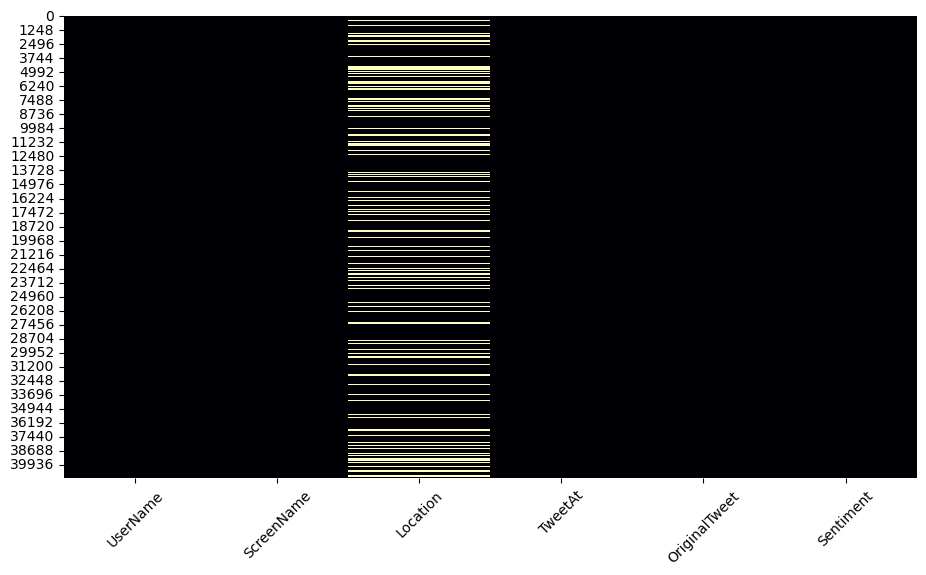

In [ ]:
#display any missing values in a heatmap
fig = plt.figure(figsize=(11,6))
ax = sns.heatmap(df_covid.isnull(),cmap = 'magma',cbar = False);
ax.tick_params(axis='x', labelrotation=45)

plt.show()

### Preprocessing of Dataset.

##### Remove URLs, Lat & Long, dot-com, and &amp entries from Location column in dataset.

In [7]:
import re

df_loc = df_covid

#fill in empty spaces with NaN values
df_loc = df_covid.replace(r'^\s*$', np.nan, regex=True)

#replace hyperlink values with NaN values
df_loc['Location'] = df_loc['Location'].replace(r'https?://.*',np.NaN, regex=True)

#replace .com values with NaN values
df_loc['Location'] = df_loc['Location'].replace(r'.*.com?.*',np.NaN, regex=True)

#replace '?' values with NaN values
df_loc['Location'] = df_loc['Location'].replace(r'\?{1,31}',np.NaN, regex=True)

#replace any numerical values with NaN values
df_loc['Location'] = df_loc['Location'].replace(r'\d+',np.NaN, regex=True)

# Replace any value starting with 'ÜT:' followed by coordinates
df_loc['Location'] = df_loc['Location'].replace(r'^ÜT:.*', np.nan, regex=True)

#replace any entries with | sympbol with NaN values
df_loc['OriginalTweet'] = df_loc['OriginalTweet'].replace(r'\&',np.NaN, regex=True)

#replace any hashtags with NaN values
df_loc['Location'] = df_loc['Location'].replace(r'.*#+',np.NaN, regex=True)

#inspect number of missing values from dataset
print(df_loc.isna().sum().sort_values(ascending=False),\
      '\n\n', df_loc.shape)

Location         11395
OriginalTweet     3020
UserName             0
ScreenName           0
TweetAt              0
Sentiment            0
dtype: int64 

 (41157, 6)


In [8]:
#remove missing values
df_loc.dropna(axis=0, inplace=True)
print(df_loc.isna().sum().sort_values(ascending=False),\
      '\n\n', df_loc.shape)

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64 

 (27502, 6)


In [9]:
#determine the number of unique locations
print("The number of unique locations is: ", + df_loc.Location.nunique())

The number of unique locations is:  9901


**Inference:** The entries of Location are highly variable; including open-ended responses by users.

##### Create a Column in Dataset with Country Names Using Splitting Function

In [10]:
#df_entries.columns = 'Entry'
#= df_entries['0'].str.split(',', expand=True).str()[-1]
df_loc['Country'] = np.where(df_loc['Location'].str.split(',s|,').str.len() >= 1,\
                             df_loc['Location'].str.split().str.get(-1), 'Unknown')
df_loc.Country.value_counts()

USA         1665
England     1474
India        889
CA           831
UK           727
            ... 
Sonora         1
trent!         1
Fish           1
Springs.       1
sudan          1
Name: Country, Length: 3596, dtype: int64

#### **Discovering countries in the negative sentiment dataset.**

In [11]:
#select only 'negative' and 'extremely negative' rated tweets
neg_df =df_loc[(df_loc['Sentiment'] == 'Negative') | (df_loc['Sentiment'] == 'Extremely Negative')]

neg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10132 entries, 9 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       10132 non-null  int64 
 1   ScreenName     10132 non-null  int64 
 2   Location       10132 non-null  object
 3   TweetAt        10132 non-null  object
 4   OriginalTweet  10132 non-null  object
 5   Sentiment      10132 non-null  object
 6   Country        10132 non-null  object
dtypes: int64(2), object(5)
memory usage: 633.2+ KB


**Inference:** After removing the missing values and selecting only Negatively skewed sentiments, there are 11,206 entries in the Location column left.  This dataset will be used to assess negativity by geographical location

#### Extract Country Data from Location Feature

##### List of Country Names

In [ ]:
#create a list of countries
countries = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', \
             'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', \
             'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', \
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', \
             'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of',\
             'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', \
             'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', \
             'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',\
             'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', \
             'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros',\
             'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands',\
             'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus',\
             'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', \
             'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',\
             'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland',\
             'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', \
             'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', \
             'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', \
             'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', \
             'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', \
             'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', \
             'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey',\
             'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", \
             'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic",\
             'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',\
             'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia',\
             'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', \
             'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of',\
             'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat',\
             'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', \
             'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', \
             'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', \
             'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', \
             'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', \
             'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', \
             'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', \
             'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', \
             'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe',\
             'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',\
             'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands',\
             'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands',\
             'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', \
             'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', \
             'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', \
             'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago',\
             'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu',\
             'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', \
             'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu',\
             'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British',\
             'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']



##### Import PyCountries Package

In [33]:
#install country_list
!pip install pycountry
import pycountry
from pycountry import countries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 21.5 MB/s eta 0:00:00


##### Create 'Country Names' List

In [34]:
#retrieve all entries from pycountry.countries library
country_list = []
for i in pycountry.countries:
    country_list.append(i)

#create empty dictionary to append the key:values
countries_lookup = {}

#retrieve only the names and codes from alpha_2 level
for country in country_list:
    countries_lookup[country.alpha_2]=country.name

#assign values to a list and make lowercase
co_names = countries_lookup.values()

co_names_list = []

for i in co_names:
    co_names_list.append(i.lower())

#assign to a set
co_set = set(co_names_list)

In [35]:
print(len(co_set))

249


##### Using a For Loop to Iterate through target column and match Country Names

In [ ]:
"""
create list of values from the Country column of dataframe
"""
#convert to string values
#df_loc['Country'] = df_loc['Country'].astype(str)

#df_loc.Country.fillna(value=np.nan, inplace=True)
entries = [str(x).lower() for x in neg_df.Location.values]

#create new dataframe Series of those entries
df_entries = pd.DataFrame(entries)


#create empty list to append matches
matching_countries = []

for key, value in df_entries.items():
    for text in value:
        for country in co_set:
            if country in text: ##appends already known matches to the list
                matching_countries.append(country)


#create a list of state names
states =    ['AL', "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", \
            "HI", "ID", "IL", "IN", "IA", "KS", "KY",
        "LA", "ME", "MD", "MA",
           "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", \
            "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", \
        "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

states = [state.lower() for state in states]

#create empty list to append matches
matching_countries_states = []

for key, value in df_entries.items():
    for text in value:
        for country in co_set:
            if country in text: ##appends already known matches to the list
                matching_countries_states.append(country)
            elif text in states:  ##appends 'united states' for matching states to the list
                matching_countries_states.append('united states')

print(pd.DataFrame(matching_countries).value_counts(), '\n\n',\
      "Number of Countries Discovered using General Search: ", len(matching_countries), '\n\n',\
     pd.DataFrame(matching_countries_states).value_counts(), '\n\n',\
      "Number of Countries Discovered including States of USA: ", len(matching_countries_states))

india             381
united kingdom    239
canada            230
australia         228
united states     180
                 ... 
kazakhstan          1
latvia              1
libya               1
luxembourg          1
andorra             1
Name: count, Length: 115, dtype: int64 

 Number of Countries Discovered using General Search:  2628 

 united states     7899
india              381
united kingdom     239
canada             230
australia          228
                  ... 
kazakhstan           1
latvia               1
libya                1
luxembourg           1
andorra              1
Name: count, Length: 115, dtype: int64 

 Number of Countries Discovered including States of USA:  10347


### Plot visualizations of country locations.

##### Create DataFrames from Country Lists.

In [ ]:
#create an dictionary of the number of values for each country
co_gen_dict = dict((x, matching_countries.count(x)) for x in matching_countries)
co_states_dict = dict((x, matching_countries_states.count(x)) for x in matching_countries_states)

#assign the dictionaries to dataframes
co_gen_df = pd.DataFrame.from_dict(co_gen_dict, orient='index')
co_states_df = pd.DataFrame.from_dict(co_states_dict, orient='index')

#add a column name to each dataframe
co_gen_df.columns = ['co_count']
co_states_df.columns = ['co_count']

#sort each dataframe by count values, descending
co_gen_df = co_gen_df.sort_values(by='co_count', ascending=False)
co_states_df = co_states_df.sort_values(by='co_count', ascending=False)


In [ ]:
print(co_gen_df.head(), '\n\n', co_states_df.head())

                co_count
india                381
united kingdom       239
canada               230
australia            228
united states        180 

                 co_count
united states       7899
india                381
united kingdom       239
canada               230
australia            228


In [ ]:
#add numerical index values
co_list = co_gen_df.index.tolist()
co_gen_df['country'] = co_list

co_list = co_states_df.index.tolist()
co_states_df['country'] = co_list

##### Create Plots of the Country Count Dataframes

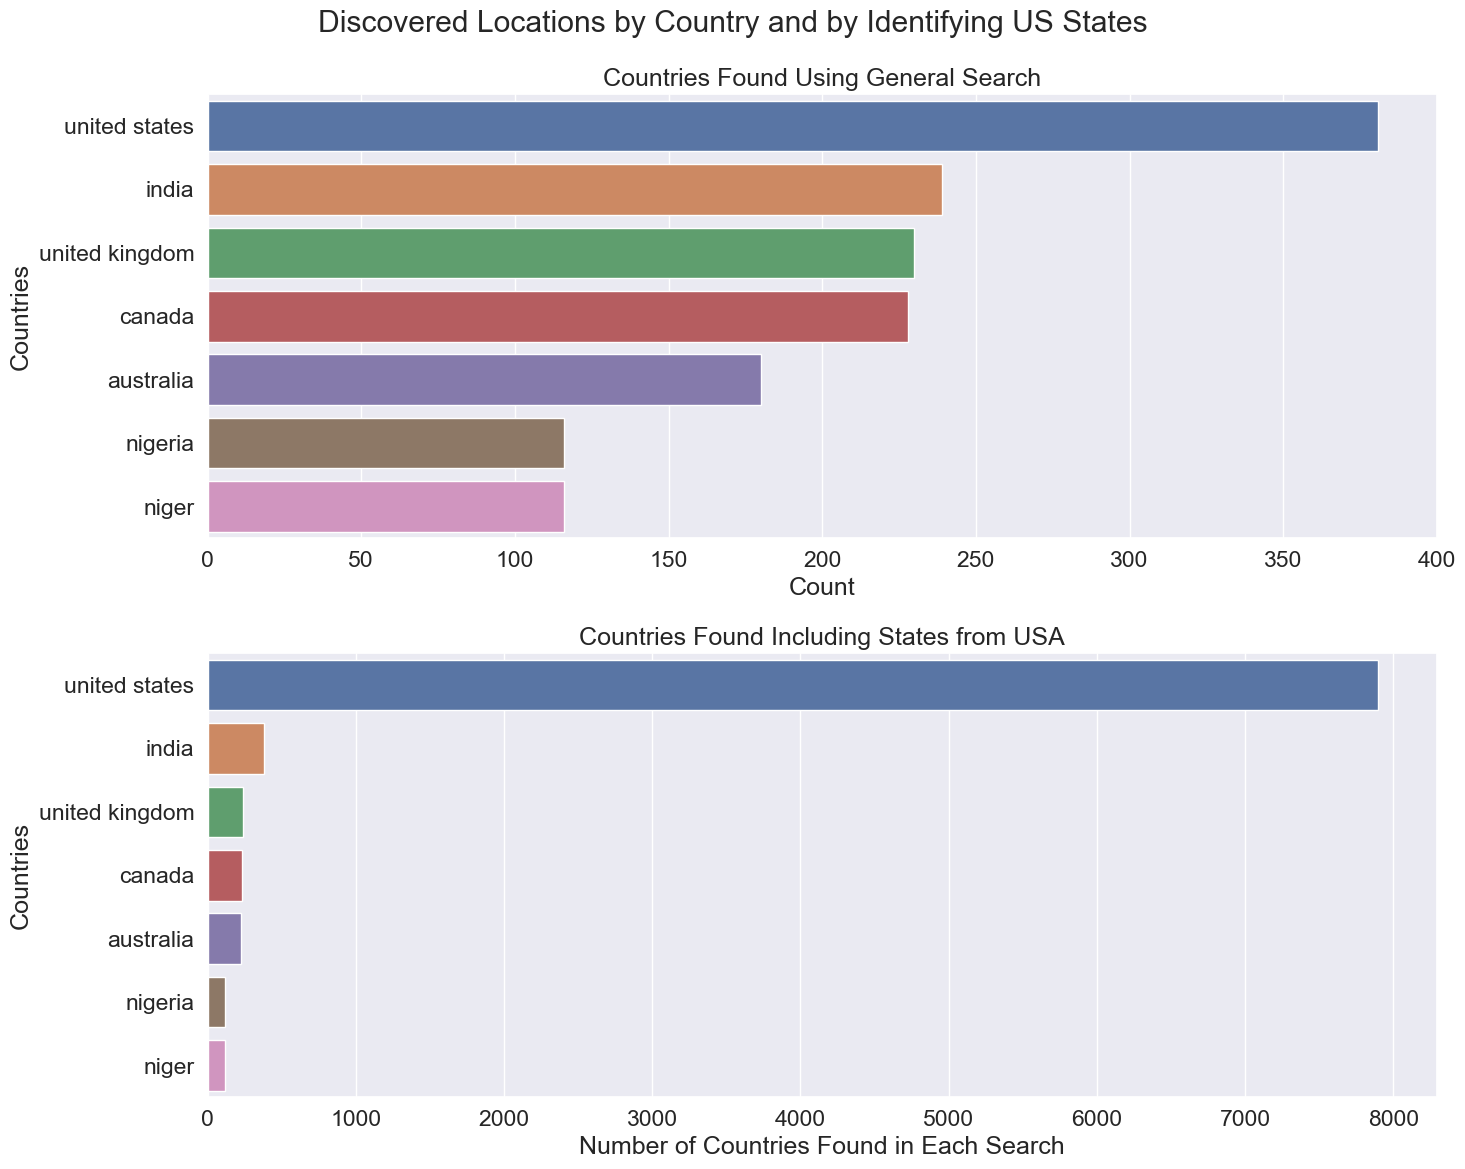

In [ ]:
#filter the grouped dataset by job titles occuring more than 100 times
sorted_df_gen = co_gen_df[co_gen_df["co_count"] > 100]
sorted_df_states = co_states_df[co_states_df["co_count"] > 100]

#create subsplots
fig, (ax1, ax2) = plt.subplots(2, sharey=True, figsize = (15, 12))

#plot the first subplot
sns.barplot(data=sorted_df_gen,x="co_count", y="country",\
                ax = ax1,
                 orient="h",\
             #    height=5, aspect=2, kind="bar"
                    )

#plot the second subplot
sns.barplot(data=sorted_df_states, x="co_count", y="country", \
            ax = ax2,
                   orient="h",\
            #        height=5, aspect=2,  kind="bar",
                    )
#adjust axes and titles
ax1.set(ylabel="Countries")
ax2.set(ylabel="Countries")
ax1.set(xlabel="Count")
plt.xlabel("Number of Countries Found in Each Search")

ax1.set(title="Countries Found Using General Search")
ax2.set(title="Countries Found Including States from USA")
plt.suptitle("Discovered Locations by Country and by Identifying US States")
sns.set(font_scale=1.5)
#ax.tick_params(axis='y', labelrotation=45)
plt.tight_layout()
plt.show()

## Sentiment Analysis

#### Import Libraries

In [ ]:
# Install neccesary Packages
!python -m spacy download en_core_web_lg
!pip install -q -U tensorflow-text
!pip install -q tf-models-official

^C
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.0/587.7 MB 165.2 kB/s eta 0:59:19
     -------------------------------------- 0.0/587.7 MB 245.8 kB/s eta 0:39:52
     -------------------------------------- 0.2/587.7 MB 893.0 kB/s eta 0:10:58
     ---------------------------------------- 0.6/587.7 MB 2.9 MB/s eta 0:03:23
     ---------------------------------------- 1.8/587.7 MB 6.6 MB/s eta 0:01:29
     ---------------------------------------- 3.0/587.7 MB 9.5 MB/s eta 0:01:02
     --------------------------------------- 4.1/587.7 MB 11.4 MB/s eta 0:00:52
     --------------------------------------- 5.2/587.7 MB 12.9 MB/s eta 0:00:46
     --------------------------------------- 6.3/587.7 MB 13.9 MB/s eta 0:00:42
     --------------------------------------- 7.5/587.7 MB 15.0 MB/s eta 0:00:39
      -------------------------------------- 8.6/58

ERROR: Could not find a version that satisfies the requirement tensorflow-text (from versions: none)
ERROR: No matching distribution found for tensorflow-text
  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [54 lines of output]
  running egg_info
  writing lib3\PyYAML.egg-info\PKG-INFO
  writing dependency_links to lib3\PyYAML.egg-info\dependency_links.txt
  writing top-level names to lib3\PyYAML.egg-info\top_level.txt
  Traceback (most recent call last):
    File "C:\Users\user\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\user\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\user\anaconda3\Lib\site-packages\pip\_vendor\pyprojec

In [ ]:
import en_core_web_lg
import sklearn

!pip install keras
!pip install tensorflow
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Activation
from keras.layers import Input, TextVectorization
from keras.callbacks import *
from keras.metrics import *
from keras.backend import clear_session
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.models import load_model
from sklearn.model_selection import train_test_split

### Assign Sentiment Values Based Upon Vader Sentiment Score

In [12]:
!pip install vaderSentiment
import vaderSentiment
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk import  PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser=SentimentIntensityAnalyzer()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


#### Remove 'stop' words

In [13]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

pat = r'\b(?:{})\b'.format('|'.join(stop))
df_loc['CleanTweet'] = df_loc['OriginalTweet'].str.replace(pat, '')
df_loc['CleanTweet']= df_loc['CleanTweet'].str.replace(r'\s+', ' ')

print(stop, '\n\n')

df_loc['CleanTweet'].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-13-8809e8cd5fdf>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loc['CleanTweet'] = df_loc['OriginalTweet'].str.replace(pat, '')
<ipython-input-13-8809e8cd5fdf>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loc['CleanTweet']= df_loc['CleanTweet'].str.replace(r'\s+', ' ')


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

0     @MeNyrbie @Phil_Gahan @Chrisitv https://.co/iF...
1     advice Talk neighbours family exchange phone n...
2     Coronavirus Australia: Woolworths give elderly...
7     Was supermarket today. Didn' buy toilet paper....
8     Due COVID-19 retail store classroom Atlanta op...
9     For corona prevention, stop buy things cash us...
10    All month ' crowding supermarkets restaurants,...
11    Due Covid-19 situation, increased demand food ...
12    #horningsea caring community. Let ALL look le...
13    Me: I ' need stock food, I' Amazon deliver wha...
Name: CleanTweet, dtype: object

In [14]:
def clean_text(text):
  ps=PorterStemmer()
  text_cleaned="".join([x for x in text if x is not string.punctuation])#removing punctuation mark
  text_cleaned=re.sub(' +',' ',text_cleaned)#replace a number of string spaces by a single space
  text_cleaned=text_cleaned.lower()
  tokens=text_cleaned.split(" ")
  tokens=[token for token in tokens if token not in STOPWORDS]
  text_cleaned=" ".join([ps.stem(token) for token in tokens])#stemming of words

  return text_cleaned

In [15]:
df_loc['CleanTweet']=df_loc['CleanTweet'].apply(lambda x:clean_text(x))

##### Define Sentiment Evaluator function

In [16]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound']

In [17]:
df_loc['Vader_score']=df_loc['CleanTweet'].apply(lambda x:compound_score(x))
df_loc['Vader_score']

0        0.0000
1        0.1531
2        0.0000
7       -0.1531
8        0.4738
          ...  
41146    0.7430
41147   -0.6072
41149   -0.3182
41152    0.0000
41156    0.4215
Name: Vader_score, Length: 27502, dtype: float64

#### Assign Values to Vader Scores

In [18]:
#write function to assign values to the Vader scores
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

#call the function on the target feature
df_loc['Vader_sentiment']=df_loc['Vader_score'].apply(lambda x :sentiment_category(x))

df_loc['Vader_sentiment'].value_counts()

positive    11220
negative     9076
neutral      7206
Name: Vader_sentiment, dtype: int64

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


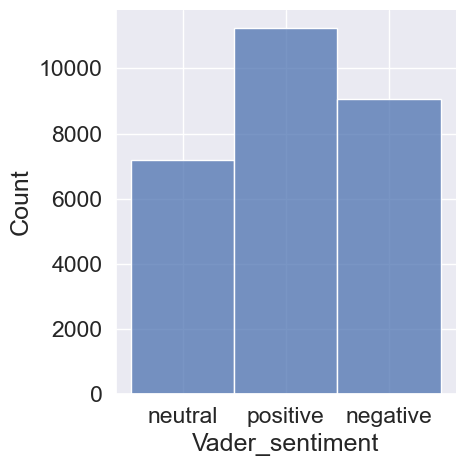

In [ ]:
counts = df_loc.groupby('Vader_sentiment').UserName.count()


sns.displot(df_loc.Vader_sentiment)

#### Get most common words from 'negative' and 'positive' sentiments.

In [ ]:
pos_tweets=df_loc.loc[df_loc['Vader_sentiment']=='positive','CleanTweet'].tolist()
pos_tweets[0:5]

['advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order',
 'due covid-19 retail store classroom atlanta will open walk-in busi class next two weeks, begin monday, march 16. will continu process onlin phone order normal! thank understanding! https://t.co/kw91zj5o5i',
 'due covid-19 situation, increas demand food products. \r\r\n\r\r\nthe wait time may longer onlin orders, particularli beef share freezer packs. \r\r\n\r\r\nwe thank patienc time.',
 '#horningsea care community. let\x92 look less capabl villag ensur stay healthy. bring shop doors, help onlin shop self isol symptom expos somebodi has. https://t.co/lsgrxxhjhh',
 'me: need stock food, amazon deliv whatev need #coronavirus\r\r\n\r\r\namazon: https://t.co/8ywakfjexc']

In [ ]:
neg_tweets=df_loc.loc[df_loc['Vader_sentiment']=='negative','CleanTweet'].tolist() # extracting all negative reviews and converting to a list
neg_tweets[0:5]

['supermarket today. buy toilet paper. #rebel\r\r\n\r\r\n#toiletpapercrisi #covid_19 https://t.co/evxkqlidaz',
 'corona prevention,w stop buy thing cash use onlin payment method corona spread notes. prefer onlin shop home. time fight covid 19?. #govindia #indiafightscorona',
 "struggling, pleas consid donat food bank nonprofit. demand servic will increas covid-19 impact jobs, people' way life.",
 '@10downingstreet @grantshapp done ensur food essenti product re-stock supermarket panic buy activ discouraged? left checkout staff polic action selfish profit',
 'prepar higher demand potenti food shortage, hunger coalit purchas 10 percent food implement new protocol due covid-19 coronavirus. https://t.co/5cecytlnyn']

### Examine the most common words used in 'negative' and 'positive' tweets

In [ ]:
from collections import Counter
def getMostCommon(tweet_list, topn=20):
    tweets = " ".join(tweet_list)
    tokenised_tweets = tweets.split(" ")
    freq_counter=Counter(tokenised_tweets)
    return freq_counter.most_common(topn)

In [ ]:

def plotMostCommonWords(tweet_list,topn=20,title="Commonly Tweeted Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(tweet_list, topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

In [ ]:
top_pos_tweets=getMostCommon(pos_tweets,20)
top_pos_tweets

[('#coronaviru', 3480),
 ('store', 1841),
 ('groceri', 1750),
 ('price', 1683),
 ('supermarket', 1637),
 ('hand', 1507),
 ('food', 1487),
 ('help', 1382),
 ('consum', 1381),
 ('covid-19', 1333),
 ('will', 1280),
 ('peopl', 1235),
 ('shop', 1193),
 ('#covid19', 1150),
 ('go', 1028),
 ('need', 997),
 ('sanit', 992),
 ('onlin', 961),
 ('19', 930),
 ('work', 804)]

In [ ]:
top_neg_tweets=getMostCommon(neg_tweets,20)
top_neg_tweets

[('#coronaviru', 2864),
 ('price', 2200),
 ('food', 1886),
 ('peopl', 1357),
 ('supermarket', 1327),
 ('covid-19', 1325),
 ('store', 1251),
 ('groceri', 1237),
 ('panic', 1163),
 ('will', 1044),
 ('go', 969),
 ('consum', 934),
 ('buy', 894),
 ('demand', 826),
 ('19', 816),
 ('shop', 792),
 ('#covid19', 742),
 ('covid', 704),
 ('need', 688),
 ('oil', 578)]

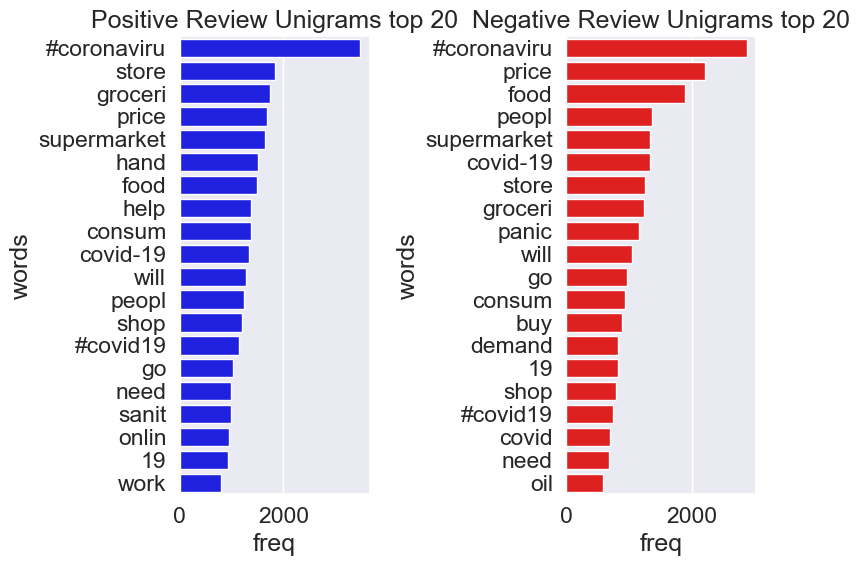

In [ ]:

from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(pos_tweets,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(neg_tweets,20,"Negative Review Unigrams",color="red",axis=ax[1])
plt.tight_layout()
plt.show()

**Inference:** There is a lot of overlap in terms of unigrams used in "negative" and "positive" tweets; however, negative-sentiment includes "panic," and has "people" and "price" closer to the top.

### Prediction of Sentiment by Classification Models

In [19]:
df_loc.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country,CleanTweet,Vader_score,Vader_sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London,@menyrbi @phil_gahan @chrisitv https://.co/ifz...,0.0000,neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,UK,advic talk neighbour famili exchang phone numb...,0.1531,positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,"coronaviru australia: woolworth give elderly, ...",0.0000,neutral
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,Austria,supermarket today. didn' buy toilet paper. #re...,-0.1531,negative
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,USA,due covid-19 retail store classroom atlanta op...,0.4738,positive


##### Create Vader Scores that target 'negative' tweets.  Positive and Neutral sentiments will be assigned "0".

In [25]:
# Replace the 'negative' value with 1, since this is our outcome of interest
# We will also consider neutral sentiments to be non negative, hence a value of 0

def sentiment_category(score):
    if score >= -0.05:
        return "0"
    elif score < -0.05:
        return "1"


#call the function on the target feature
df_loc['Vader_sentiment']=df_loc['Vader_score'].apply(lambda x :sentiment_category(x))

df_loc['Vader_sentiment'].value_counts()

0    18426
1     9076
Name: Vader_sentiment, dtype: int64

In [26]:
df_loc.Vader_sentiment = pd.to_numeric(df_loc.Vader_sentiment)
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27502 entries, 0 to 41156
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UserName         27502 non-null  int64  
 1   ScreenName       27502 non-null  int64  
 2   Location         27502 non-null  object 
 3   TweetAt          27502 non-null  object 
 4   OriginalTweet    27502 non-null  object 
 5   Sentiment        27502 non-null  int64  
 6   Country          27502 non-null  object 
 7   CleanTweet       27502 non-null  object 
 8   Vader_score      27502 non-null  float64
 9   Vader_sentiment  27502 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 3.3+ MB


In [27]:
# Replace the 'negative' value with 1, since this is our outcome of interest
# We will also consider neutral sentiments to be non negative, hence a value of 0
df_loc['Sentiment'] = df_loc['Sentiment'].replace({'Extremely Positive': 0, 'Positive':0,'Neutral':0,\
                                                   'Negative':1, 'Extremely Negative': 1})

#Only keep the tweet_id, sentiment, and text fields
df_data = df_loc[['Sentiment', 'Vader_sentiment', 'CleanTweet']]

In [28]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27502 entries, 0 to 41156
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentiment        27502 non-null  int64 
 1   Vader_sentiment  27502 non-null  int64 
 2   CleanTweet       27502 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.8+ MB


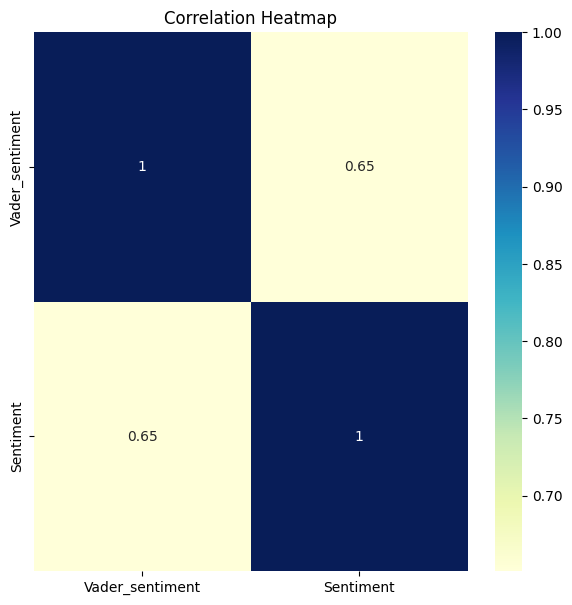

In [29]:
num_cols = ['Vader_sentiment', 'Sentiment']

var_corr = df_data[num_cols].corr()

plt.figure(figsize=(7, 7))
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

**Inference:** The correlation between "negative" Sentiment values is only 0.65, which means that there is some disagreement betweeen the classifications made by Vader sentiment, and the inherent sentiment classifications (i.e., that were assigned originally).

## Core Models: Logistic Regression, SVC, Decision Tree, Random Forest, Boosted Tree, Neural Net, MultinomialNB

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve

In [ ]:
# Transform words to lowercase & define x and y Variables
X = np.char.lower(df_data['CleanTweet'].values.astype(str))
y = df_data['Sentiment']
y1 = df_data['Vader_sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [ ]:
# List the models that will be built
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Neural Net',
         'Naive Bayes']

# Define the correponding list of classifiers, set parameters where needed
classifiers = [LogisticRegression(),
               SVC(probability=True),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth=5, n_estimators=10),
               AdaBoostClassifier(),
               MLPClassifier(alpha=1, max_iter=1000),
               MultinomialNB()
               ]

In [ ]:
for name, clf in zip(model_names, classifiers):
  clf_pipe = Pipeline([
                    ('tfidf', TfidfVectorizer(stop_words=stop)), # remove stopwords
                    (name, clf),
                    ])

  clf_pipe.fit(x_train,y_train)

  pred = clf_pipe.predict(x_test)
  pred_prob = clf_pipe.predict_proba(x_test)[:, 1]

  fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
  precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

  print('\n\n', name, '\n\n')
  print(classification_report(y_test, pred))
  print('ROC AUC: ', auc(fpr, tpr))
  print('Precision/Recall AUC: ', auc(precision, recall))
  print('\n\n')

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




 Logistic Regression 


              precision    recall  f1-score   support

           0       0.80      0.93      0.86      5713
           1       0.83      0.61      0.70      3363

    accuracy                           0.81      9076
   macro avg       0.81      0.77      0.78      9076
weighted avg       0.81      0.81      0.80      9076

ROC AUC:  0.8892910509384386
Precision/Recall AUC:  0.4199938993618797





 SVM 


              precision    recall  f1-score   support

           0       0.80      0.93      0.86      5713
           1       0.84      0.61      0.71      3363

    accuracy                           0.81      9076
   macro avg       0.82      0.77      0.79      9076
weighted avg       0.82      0.81      0.81      9076

ROC AUC:  0.8980135085850753
Precision/Recall AUC:  0.42971337347719973





 Decision Tree 


              precision    recall  f1-score   support

           0       0.69      0.95      0.80      5713
           1       0.75      0.2

### Evaluation of Core Models


**Performance Metrics.**

**Accuracy** -- the number of correct predictions based upon all predictions made by the model.

**Recall** --  off all the potential actual positive values in the testing data, the number correctly identified by the model.  Compared to **Precision**, which is the proportion of positive identifications that are actually correct.

**ROC AUC** -- The ROC AUC curve is the best general identifier of a model to distinguish between classes at different thresholds along the True Positive Rate and False Positive Rate.  The greater number of True Positive values there are, the fewer False Positive values; resulting in a greater Area Under the ROC Curve (AUC).

**F1 Score** -- or F-measure or balanced F-score, is designated as the harmonic mean because it evaluates a model's recall and precision

**Inference:** The best performing classification models, in terms of identifing negative sentiments in tweets related to Covid, are Support Vector Machine (SVM) and Logistic Regression (both are comparable in the performances).

These models had an ROC AUC score of ~89%; F1 scores of 0.71 and 0.70 for Logit and SVM, respectively, and accuracies of 81%.

## Transformer Based Models

##### Import Libraries

In [30]:
!pip install tensorflow
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 758.3 kB/s eta 0:00:00


In [36]:

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import backend
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Activation
from keras.layers import Input, TextVectorization
from keras.callbacks import *
from keras.metrics import *
from keras.backend import clear_session
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant
from keras.models import load_model

#### Instantiate the model

In [40]:
# Transform words to lowercase & define x and y Variables
X = np.char.lower(df_data['CleanTweet'].values.astype(str))
y = df_data['Sentiment']
y1 = df_data['Vader_sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [41]:
#Tokenize and pad training and test data
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(list(x_train))

#converting text into integer sequences
x_train_seq  = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

#padding to prepare sequences of same length
x_train_seq  = pad_sequences(x_train_seq, maxlen=100)
x_test_seq = pad_sequences(x_test_seq, maxlen=100)

In [42]:
#Define Metrics
METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'),
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      AUC(name='prc', curve='PR'),
      ]

In [43]:
size_of_vocabulary=len(tokenizer.word_index) + 1
print(size_of_vocabulary)

42945


In [44]:
#define the model
clear_session()

lstm_model=tf.keras.models.Sequential()

#embedding layer
max_sequence_length = len(x_train[0])  # Length of your input sequences

lstm_model.add(Embedding(size_of_vocabulary,300,\
                        trainable=True))

#lstm layer
lstm_model.add(LSTM(128,return_sequences=True,dropout=0.2))

#global maxpooling
lstm_model.add(GlobalMaxPooling1D())

#dense layer
lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))

#loss function, metrics, optimizer
lstm_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=METRICS)

#callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc=ModelCheckpoint('best_model', monitor='val_loss', mode='min', save_best_only=True, save_weights_only=False, verbose=1)

#summary of lstm_model
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         12883500  
                                                                 
 lstm (LSTM)                 (None, None, 128)         219648    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13111469 (50.02 MB)
Trainable params: 13111469 (50.02 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [45]:
#View model Performance
lstm_model_results = lstm_model.evaluate(x_test_seq, y_test, batch_size=128, verbose=0)

for name, value in zip(lstm_model.metrics_names, lstm_model_results):
  print(name, ': ', value)

loss :  0.6948877573013306
tp :  3317.0
fp :  5643.0
tn :  70.0
fn :  46.0
accuracy :  0.3731820285320282
precision :  0.37020090222358704
recall :  0.986321747303009
auc :  0.5038012266159058
prc :  0.3737122118473053


### Rerun the model using the Vader Sentiment values

In [46]:
# Transform words to lowercase & define x and y Variables
X = np.char.lower(df_data['CleanTweet'].values.astype(str))
y = df_data['Sentiment']
y1 = df_data['Vader_sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=0.33, random_state=20)

In [47]:
#Tokenize and pad training and test data
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(list(x_train))

#converting text into integer sequences
x_train_seq  = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

#padding to prepare sequences of same length
x_train_seq  = pad_sequences(x_train_seq, maxlen=100)
x_test_seq = pad_sequences(x_test_seq, maxlen=100)

In [48]:
#View model Performance
lstm_model_results = lstm_model.evaluate(x_test_seq, y_test, batch_size=128, verbose=0)

for name, value in zip(lstm_model.metrics_names, lstm_model_results):
  print(name, ': ', value)

loss :  0.6954380869865417
tp :  2943.0
fp :  6017.0
tn :  84.0
fn :  32.0
accuracy :  0.3335169553756714
precision :  0.32845982909202576
recall :  0.9892436861991882
auc :  0.5087889432907104
prc :  0.33257782459259033


##### Evaluation of Transformer model

In [49]:
!pip install transformers

In [50]:
from transformers import pipeline, set_seed

set_seed(101)
generator = pipeline('text-generation', model='gpt2-large')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [52]:
input_txt = "sick of covid lockdown"

fake_chat = pd.DataFrame(generator(input_txt, truncation=True, num_return_sequences=5))
fake_chat

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


,generated_text
0,sick of covid lockdown?\n\nBut no worries abou...
1,"sick of covid lockdown. And, of course, there'..."
2,sick of covid lockdown and so i started search...
3,sick of covid lockdown of my city. I'll give a...
4,sick of covid lockdown and the people calling ...


In [ ]:
from sklearn.preprocessing import LabelEncoder

target = fake_chat.values.tolist()

label_encoder = LabelEncoder()

X = np.array(label_encoder.fit_transform(target))


In [56]:
import pandas as pd

fake_chat = pd.DataFrame(generator(input_txt, max_length=30, num_return_sequences=5))

#fake_chat = fake_chat.astype(float)

lstm_pred = lstm_model.predict(X)

print(lstm_pred)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


860/860 [==============================] - 6s 5ms/step
[[0.49962184]
 [0.49962184]
 [0.49962184]
 ...
 [0.50029993]
 [0.49962184]
 [0.50029993]]


## Assessing LSTM Performance

Looking at the differences between the Long Short-Term Memory model's performances, it's determined that the Vader sentiment targets were less effective in capturing accurate sentiment (as compared to the original Sentiment feature).  It is uknown how the tweets were initially classified (e.g., as "positive", "negative", "neutral", and so on).  But the accuracy using either feature was poor, with ROC AUC scores only reaching chance levels (49% for either).  Therefore, for classification purposes, the Machine Learning models (i.e., Logit Regressiona and SVM) would be the beter choice.

Furthermore, additional insights were discovered through data visualization and arduous manual preprocessing techniques.  One of which is the overall negativity expressed by twitter users by geographic location (i.e., country); with United States residents being the predominate class.  Also, the unigrams in both the 'positive' and 'negative' Sentiment classifications, discovered by the Vader Analyzer, seemed to overlap broadly. But the correlation between 'negative' sentiments as classified by Vader Sentiment and the pre-labeled values in the Sentiment feature was only about two-thirds (65%).  

Finally, using generated statements that were skewed negatively (i.e., complaints about covid lockdown resrictions), Chat-GPT2 generated the above five statements.  The AI's capacity to mimic frustrated covid skeptics is admirable; however, using the LSTM model to predict the sentiment of these fabricated statements, it was unable to do so.  The likelihood for each statement having a "negative" sentiment was no better than chance for each of the predictions.  

One hyptothesis that may explain the model's difficulty in this excercise could be due to the large amounts of sarcasm inherent in the user's tweets.  The LSTM model would not understand the nuances of this linguistic style; but could be more adept at understanding explicit customer feedback (e.g., complaints about a product or service).  Still, it's possible that the data science processes expressed here were not best-practices, and all results conatined herein should not be interpreted judiciously.